# **附录3：灯光配置**

从一开始就是希望用音乐和灯光为空间渲染气氛，最简单的想法就是用灯光效果的变化响应音乐的节拍。对灯光的尝试从办公室已有的智能彩灯开始，分别用了 **Yeelight RGB** 、 **Philips Hue** 还有 Zigbee 协议接入的 **Gledopto** 。但是他们的变化频率都不能跟上音乐的节拍变化，后来又分别试用了 **WS281x** 灯带以及再后来专业的**舞台灯光**，后两类在频率变化以及稳定性上都完全满足需求。

需要补充的是：使用固定的灯光效果自始至终随节拍变化其实是非常单调的，灯光对音乐的表达方式是多样的，这里只是列出所做过的一些最基础性的尝试。

&emsp;

## **1 舞台灯光**

&emsp;

## **2 WS281x 灯带：使用树莓派直接驱动**

#### **依赖：**

+ [rpi_ws281x](https://github.com/jgarff/rpi_ws281x)

    [python-binding](https://github.com/rpi-ws281x/rpi-ws281x-python)


#### **灯带与树莓派的连接：**

+ [树莓派连接 NeoPixel 指南 (Adafruit)](https://cdn-learn.adafruit.com/downloads/pdf/neopixels-on-raspberry-pi.pdf)

+ [Raspberry Pi &
WS2812 LED-Strips](https://dordnung.de/raspberrypi-ledstrip/ws2812)


#### **root 权限运行：**

因为控制灯光需要 sudo 权限，所以安装 python 依赖时都要以 sudo 权限安装；

jupyter-lab 的启动也要以 root 权限启动：`sudo -E env "PATH=$PATH" jupyter lab --allow-root`，参考[这里](https://stackoverflow.com/questions/41622988/root-access-for-jupyter-ipython-notebook)


####  **更多的灯光效果可以参考[这里定义的函数](https://github.com/BSFEMA/RPi_WS2812/blob/master/function_library.py)**

&emsp;

In [ ]:
# 导入依赖库，输入参数值
from rpi_ws281x import PixelStrip, Color

LED_COUNT = 64              # 接入灯带灯珠的数量
LED_PIN = 18                # 数据写入线连接树莓派 GPIO 18
LED_FREQ_HZ = 800000        # 默认参数，参照依赖库中的示例代码直接使用
LED_DMA = 10                # 默认参数，参照依赖库中的示例代码直接使用
LED_BRIGHTNESS = 200        # 灯珠的亮度，范围0-255
LED_INVERT = False          # 默认参数，参照依赖库中的示例代码直接使用
LED_CHANNEL = 0             # 默认参数，参照依赖库中的示例代码直接使用



# 按以上参数初始化
strip = PixelStrip(LED_COUNT, LED_PIN, LED_FREQ_HZ, LED_DMA, LED_INVERT, LED_BRIGHTNESS, LED_CHANNEL)
strip.begin()



# 以函数的方式简单定义一种灯光效果，就是让所有灯珠呈现某一种颜色
# 颜色直接使用依赖库现成的函数 Color(r,g,b) 定义
def ColorWipe(strip, color):
    for i in range(strip.numPixels()):
        strip.setPixelColor(i, color)
    strip.show()

    
# 让灯带呈现红色
ColorWipe(strip, Color(255,0,0))

&emsp;

## **3 智能 RGB 彩灯之 Yeelight**

1. 手机下载安装 Yeelight APP，按照提示将灯泡接入网络

2. 使用 [Yeelight Python 库](https://yeelight.readthedocs.io/en/latest/)通过代码直接调控灯光
    
    CodeLab Adapter 已内置这个库，可以在[创作平台](https://create.codelab.club/projects/editor/)中通过 EIM 积木直接使用，文档[在此](https://adapter.codelab.club/extension_guide/yeelight/)。
    
    
&emsp;

**下面分别以 python 代码和 Scratch 积木的形式列出可能会有用的控制和功能：**

In [3]:
from yeelight import *
from yeelight.transitions import *
from yeelight import Flow
import numpy

&emsp;

#### **3.1 搜索识别网络内的 yeelight 灯泡**

在 Scratch 中可以这样实现：

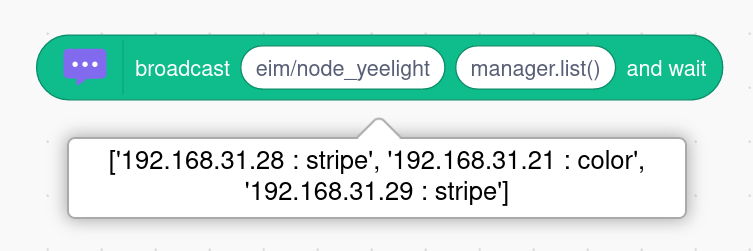

在 Python 中可以这样：

In [7]:
# 打印已接入的灯泡列表

def print_discovered_bulbs():
    # 主要用到 discovered_bulbs() 函数
    bulbs = discovered_bulbs()
    num = len(bulbs)
    
    print("空间网络内已接入的 yeeligth 灯泡有：  ")

    for i in numpy.arange(num):
        print(str(i) + ' ' + '{}'.format(bulbs[i]))

print_discovered_bulbs()

空间网络内已接入的 yeeligth 灯泡有：  
0 Bulb<192.168.31.29:55443, type=BulbType.Unknown>
1 Bulb<192.168.31.28:55443, type=BulbType.Unknown>
2 Bulb<192.168.31.21:55443, type=BulbType.Unknown>


</br>
</br>

#### **3.2 调节控制某个灯泡**

Scratch 中这样做：

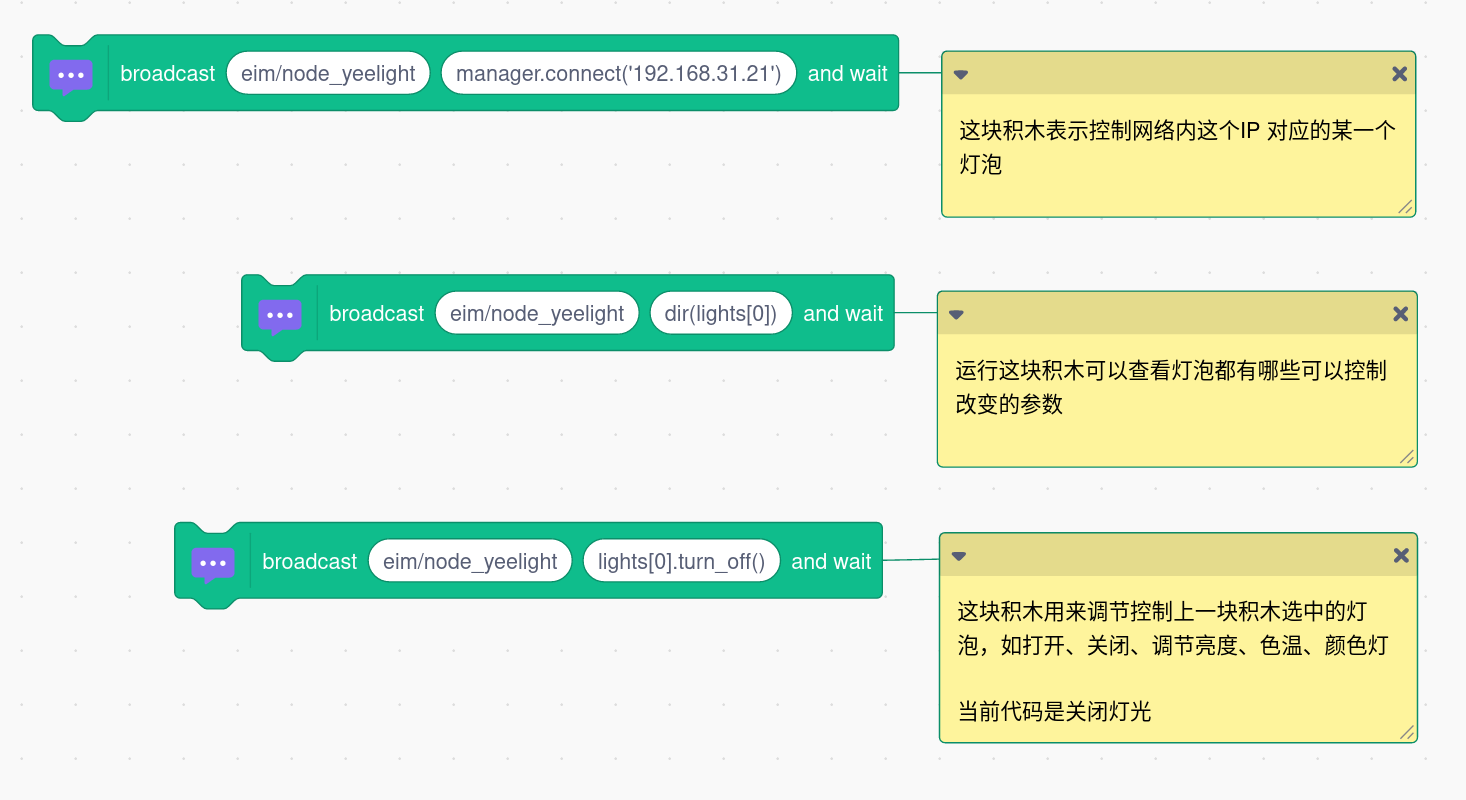

python 中这样做：

In [8]:
bulbs = discovered_bulbs()
bulbs[2].turn_on()    # 从上面 3.1 打印灯泡列表的结果可以看出 “192.168.31.21” 在接入灯泡列表中的索引是 2，所以这里是 bulbs[2]

'ok'

&emsp;

#### **3.3 音乐模式**

Adapter 文档中也已说明，Yeelight 灯泡有限制每秒连接的频率上限是 60 次，如果想要解除这一限制，就需要**开启音乐模式**。

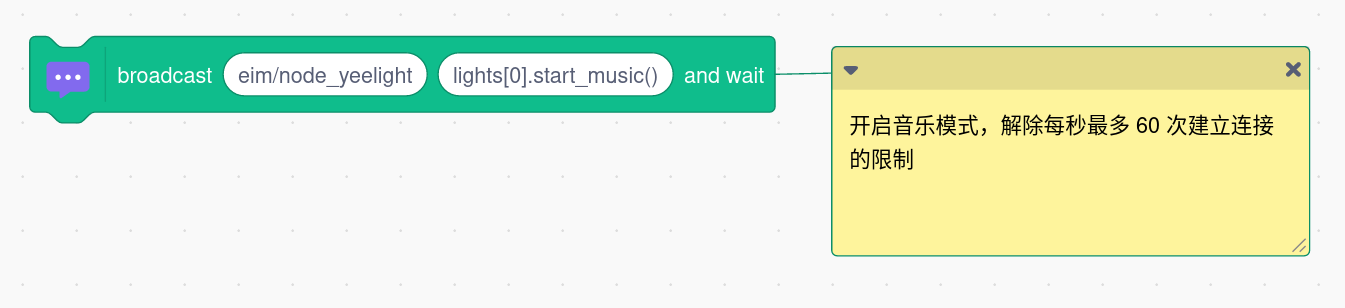

In [ ]:
bulbs[2].start_music()

&emsp;

#### **3.4 Disco 模式**

Yeelight 灯泡自带 Disco 模式，根据输入的速度参数（BPM：beats per minute）变换颜色

In [25]:
def yeel_disco(tempo):
    # 设置flow
    #bulbs_all_on()
    flow = Flow (
        count = 0,   # loop forever
        transitions=disco(bpm=tempo)
    )
    
    print('准备disco')

    bulbs[2].start_flow(flow)

In [ ]:
# tempo 值可以参考附录使用 madmom 离线式分析求得
yeel_disco(tempo=90)

In [24]:
# 停止 flow

bulbs[2].stop_flow()

'ok'

&emsp;

## **附：音乐速度（Tempo）分析**

以 **BPM(Beats Per Minute，每分钟的节拍数)** 为指标

**实时在线式分析：**

In [ ]:
from madmom.features import RNNBeatProcessor, TempoEstimationProcessor
from madmom.processors import IOProcessor, process_online

kwargs = dict(
    online = True,
    fps = 100,
    correct = True,
    infile = None,
    outfile = None,
    num_frames = 1,
    origin = 'stream'
)


def tempo_callback(tempi1, tempi2):
    print("tempo1:{}".format(tempi1))
    print("tempo2:{}".format(tempi2))
    

in_proc = RNNBeatProcessor(**kwargs)
tempo_proc = TempoEstimationProcessor(**kwargs)
out_proc = [tempo_proc, tempo_callback]
processor = IOProcessor(in_proc, out_proc)
process_online(processor, **kwargs)

&emsp;

**离线式分析本地音频文件**

用时可能会比较久

In [ ]:
from madmom.features import RNNBeatProcessor, TempoEstimationProcessor

audio = "audio/bensound-dreams.wav"
proc = TempoEstimationProcessor(fps=100)
act = RNNBeatProcessor()(audio)
tempo = proc(act)
print(round(tempo[0][0]))